# testing the model on random unlabelled images

## importing libraries

In [1]:
from keras.models import load_model
from imutils import paths
import numpy as np
import imutils
import cv2
import pickle
import glob
import os
import random
import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


## reading files  from unsolved captcha images and choosing a random image

In [2]:
files = glob.glob(os.path.join('/home/drake/Desktop/captcha scanner/unsolved-captchas/electoral-captchas',"*"))
MODEL_FILE = "/home/drake/Desktop/captcha scanner/captcha_model.hdf5"
MODEL_LABELS = "/home/drake/Desktop/captcha scanner/model_labels.dat"
captcha_file= random.choice(files)

## reading the unsolved captcha image

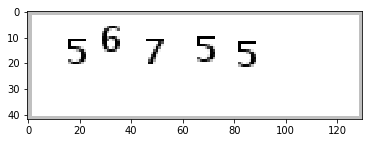

In [3]:
img = cv2.imread(captcha_file)
plt.imshow(img, cmap='gray')

##  reading the models label file for decoding of prediction

In [4]:
with open(MODEL_LABELS, "rb") as f:
    lb = pickle.load(f)

##  loading the trained model

In [5]:
model = load_model(MODEL_FILE)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.


##  segmenting the unsolved captcha image

###  refer to segmentation example notebook for detailed explanation

In [6]:
filename = os.path.basename(captcha_file)
captcha_text = os.path.splitext(filename)[-2]
image = cv2.imread(captcha_file)                 #read image
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)    #convert to gray scale
thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]  #binary inversion
contours,_ = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE) #finding contours
image_regions = []
for contour in contours:                                       
    (x, y, w, h) = cv2.boundingRect(contour)                                   # marking the contour regions
    if w / h > 1.25:
        half_width = int(w / 2)
        image_regions.append((x, y, half_width, h))
        image_regions.append((x + half_width, y, half_width, h))
    else:
        image_regions.append((x, y, w, h))
image_regions = sorted(image_regions, key=lambda x: x[0])
i=0
count=0
predictions=[]
for letter_bounding_box in image_regions:             # bounding boxes around those regions and segmenting
    x,y,w,h = letter_bounding_box
    x,y,w,h= int(x), int(y), int(w), int(h)
    letter_image = gray[y - 2:y + h + 2, x - 2:x + w + 2]      #segmenting the box on the original gray image
    letter_image= cv2.resize(letter_image,(25,25))              # resizing the segmented number image to input in the trained model
    _,letter_image = cv2.threshold(letter_image,127,255,cv2.THRESH_BINARY) # binarizing the image
    letter_image = np.expand_dims(letter_image, axis=2)
    letter_image = np.expand_dims(letter_image, axis=0)
    prediction = model.predict(letter_image)                    # predicting
    letter = lb.inverse_transform(prediction)[0]                # decoding the prediction
    predictions.append(letter)


# prediction

In [7]:
print(predictions)

['5', '6', '7', '5', '5']


# the original image

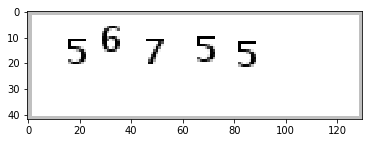

In [8]:
plt.imshow(img, cmap='gray')